# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [63]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [65]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dryden
Processing Record 2 of Set 1 | dudinka
Processing Record 3 of Set 1 | barcelos
Processing Record 4 of Set 1 | pikalevo
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | inhambane
Processing Record 10 of Set 1 | begoro
Processing Record 11 of Set 1 | kimbe
Processing Record 12 of Set 1 | paramonga
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | hotan
Processing Record 18 of Set 1 | pokhara
Processing Record 19 of Set 1 | brookings
Processing Record 20 of Set 1 | naberera
Processing Record 21 of Set 1 | klyuchi
Processing Record 22 of Set 1 | vilyuysk
Proces

In [66]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [67]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dryden,49.7833,-92.7503,-7.84,93,100,3.09,CA,1701215346
1,dudinka,69.4058,86.1778,-26.26,100,23,1.09,RU,1701214802
2,barcelos,41.5388,-8.6151,17.08,97,100,4.16,PT,1701215096
3,pikalevo,59.5183,34.1664,-5.15,97,98,1.89,RU,1701215347
4,west island,-12.1568,96.8225,25.99,69,75,4.63,CC,1701215347


In [68]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [69]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dryden,49.7833,-92.7503,-7.84,93,100,3.09,CA,1701215346
1,dudinka,69.4058,86.1778,-26.26,100,23,1.09,RU,1701214802
2,barcelos,41.5388,-8.6151,17.08,97,100,4.16,PT,1701215096
3,pikalevo,59.5183,34.1664,-5.15,97,98,1.89,RU,1701215347
4,west island,-12.1568,96.8225,25.99,69,75,4.63,CC,1701215347


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

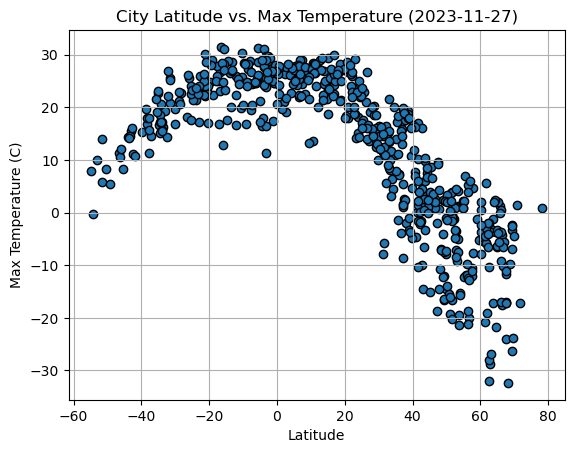

In [70]:
# Build scatter plot for latitude vs. temperature

# I imported the wrong temperature format and didn't want to redownload the data set so
# Converting Kelvin to Celsius here

x_axis = city_data_df["Lat"]
y_axis = (city_data_df["Max Temp"])

# Incorporate the other graph properties

plt.scatter(x_axis, y_axis, edgecolors="black")
plt.grid()
plt.title("City Latitude vs. Max Temperature (2023-11-27)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

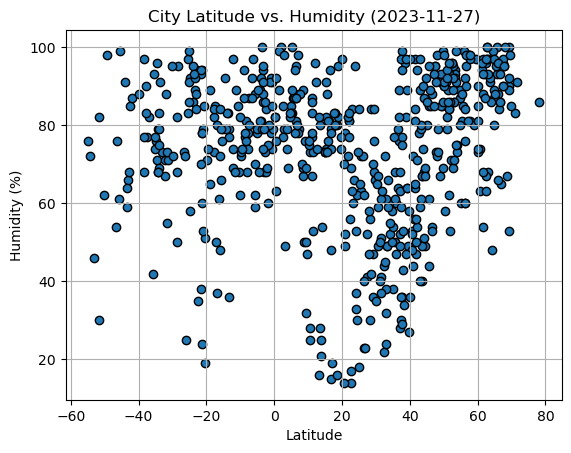

In [71]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis, y_axis, edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Humidity (2023-11-27)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

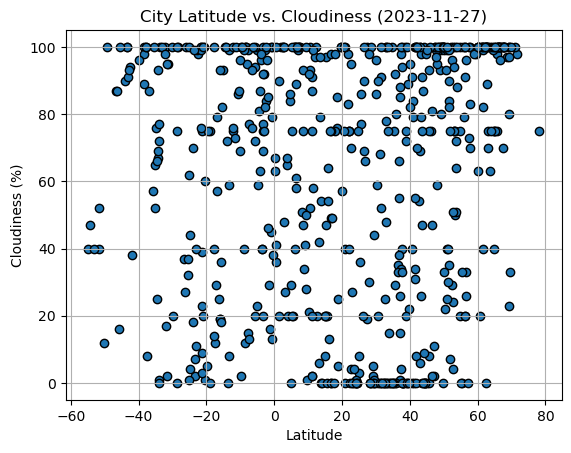

In [72]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis, edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Cloudiness (2023-11-27)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude Vs. Wind Speed

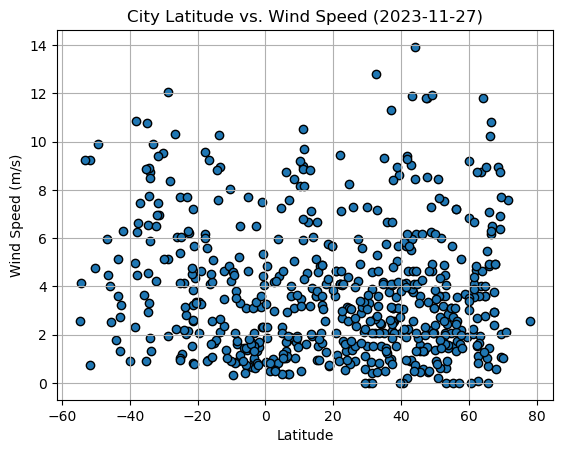

In [73]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis, edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Wind Speed (2023-11-27)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [74]:
# Define a function to create Linear Regression plots
def linreg(x_values, y_values):
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"
        plt.scatter(x_values, y_values)
        plt.plot(x_values, regress_values, "r-")      
        return slope, intercept, rvalue, regress_values, line_eq, plt
        
        

In [75]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df[city_data_df["Lat"] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dryden,49.7833,-92.7503,-7.84,93,100,3.09,CA,1701215346
1,dudinka,69.4058,86.1778,-26.26,100,23,1.09,RU,1701214802
2,barcelos,41.5388,-8.6151,17.08,97,100,4.16,PT,1701215096
3,pikalevo,59.5183,34.1664,-5.15,97,98,1.89,RU,1701215347
6,yellowknife,62.4560,-114.3525,-10.33,96,100,1.54,CA,1701215347


In [76]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df[city_data_df["Lat"] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,west island,-12.1568,96.8225,25.99,69,75,4.63,CC,1701215347
5,lebu,-37.6167,-73.6500,11.35,77,8,6.61,CL,1701215347
7,bredasdorp,-34.5322,20.0403,15.09,71,25,2.93,ZA,1701215348
8,inhambane,-23.8650,35.3833,23.68,86,18,4.16,MZ,1701215348
10,kimbe,-5.5502,150.1429,31.21,62,94,1.37,PG,1701215348


###  Temperature vs. Latitude Linear Regression Plot

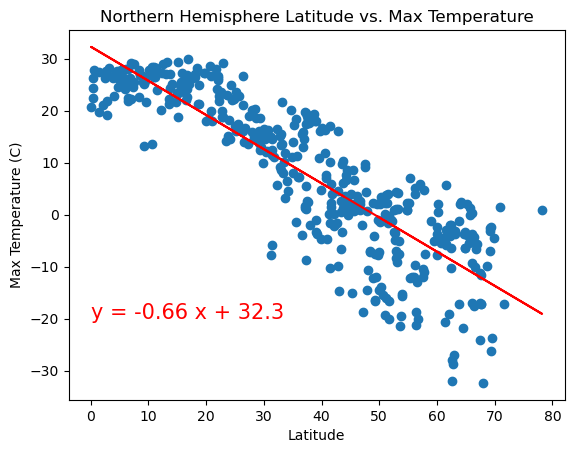

R-squared is: 0.7431281484020312


In [77]:
# Linear regression on Northern Hemisphere

north_lat = northern_hemi_df["Lat"]
north_temp = northern_hemi_df["Max Temp"]

slope, intercept, rvalue, regress_values, line_eq, plt = linreg(north_lat,north_temp)

plt.title("Northern Hemisphere Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.annotate(line_eq, (0,-20), fontsize=15, color="red")
plt.show()
print(f"R-squared is: {rvalue**2}")


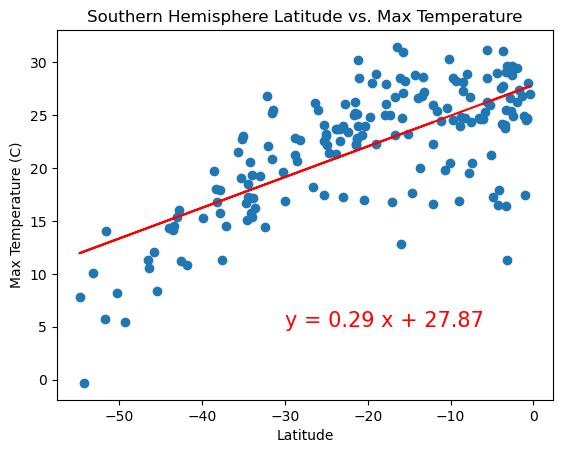

R-squared is: 0.49587167169675056


In [79]:
# Linear regression on Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_temp = southern_hemi_df["Max Temp"]

slope, intercept, rvalue, regress_values, line_eq, plt = linreg(south_lat,south_temp)

plt.title("Southern Hemisphere Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.annotate(line_eq, (-30,5), fontsize=15, color="red")
plt.show()
print(f"R-squared is: {rvalue**2}")

**Discussion about the linear relationship:** Both linear regressions show a relatively strong predictive function (according to the r squared value) for latitude and temperature. As one approaches the equator from the north or the south the temperature tends to increase. 

### Humidity vs. Latitude Linear Regression Plot

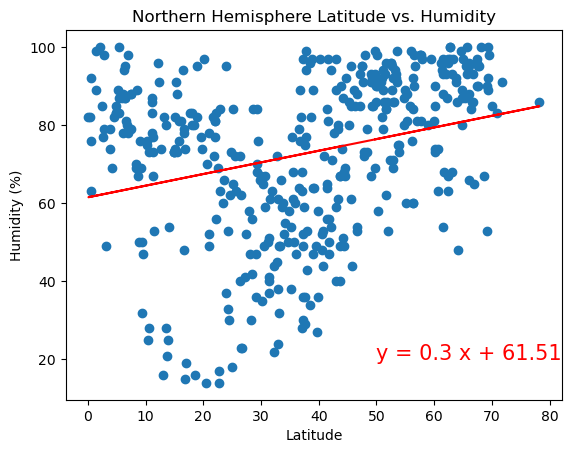

R-squared is: 0.07741902343341282


In [80]:
# Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_hum = northern_hemi_df["Humidity"]

slope, intercept, rvalue, regress_values, line_eq, plt = linreg(north_lat,north_hum)

plt.title("Northern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq, (50,20), fontsize=15, color="red")
plt.show()
print(f"R-squared is: {rvalue**2}")

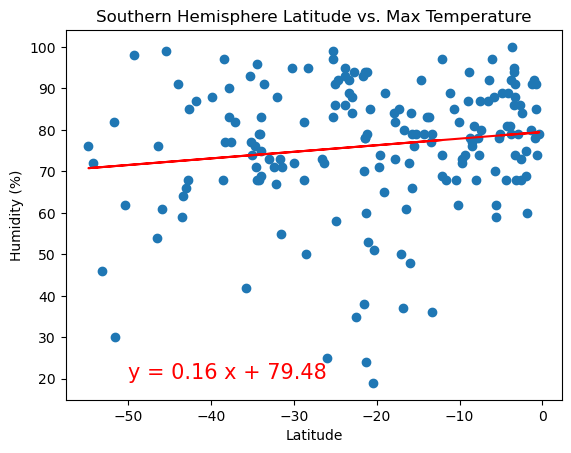

R-squared is: 0.021208288663179413


In [81]:
# Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_hum = southern_hemi_df["Humidity"]

slope, intercept, rvalue, regress_values, line_eq, plt = linreg(south_lat,south_hum)

plt.title("Southern Hemisphere Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq, (-50, 20), fontsize=15, color="red")
plt.show()
print(f"R-squared is: {rvalue**2}")

**Discussion about the linear relationship:** The r squared values show that latitude is not strongly predictive of humidity in either hemisphere. In the northern hemisphere as one approaches the equator the humidity may tend to decrease slighly. In the southern hemisphere the humidity may tend to increase slightly. 

### Cloudiness vs. Latitude Linear Regression Plot

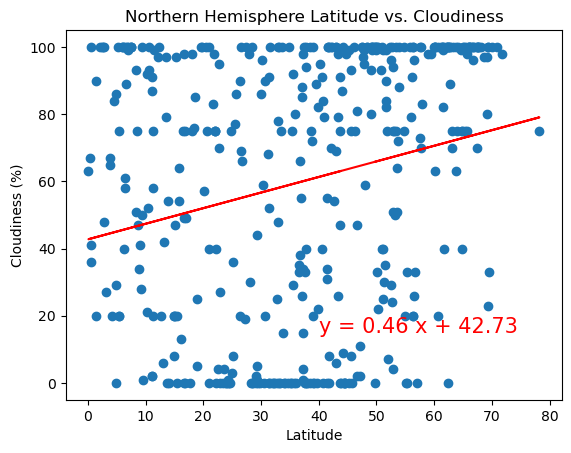

R-squared is: 0.05377288055045873


In [82]:
# Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_cloud = northern_hemi_df["Cloudiness"]

slope, intercept, rvalue, regress_values, line_eq, plt = linreg(north_lat,north_cloud)

plt.title("Northern Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (40,15), fontsize=15, color="red")
plt.show()
print(f"R-squared is: {rvalue**2}")

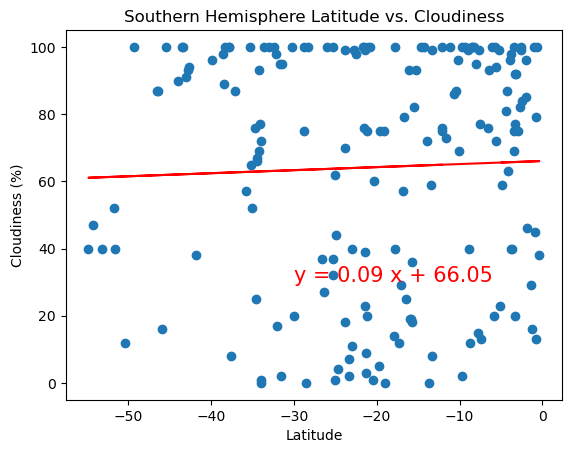

R-squared is: 0.0013748287739086637


In [83]:
# Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_cloud = southern_hemi_df["Cloudiness"]

slope, intercept, rvalue, regress_values, line_eq, plt = linreg(south_lat,south_cloud)

plt.title("Southern Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (-30, 30), fontsize=15, color="red")
plt.show()
print(f"R-squared is: {rvalue**2}")

**Discussion about the linear relationship:** Both r squared values show that latitude is not very strongly predictive of cloudiness. There is a slight increase in cloudiness as latitude increases northward compared to the soutern-most latitude

### Wind Speed vs. Latitude Linear Regression Plot

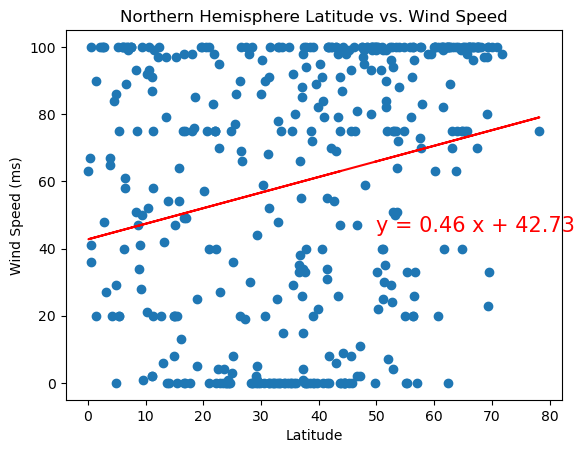

R-squared is: 0.05377288055045873


In [84]:
# Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_wind = northern_hemi_df["Wind Speed"]

slope, intercept, rvalue, regress_values, line_eq, plt = linreg(north_lat,north_cloud)

plt.title("Northern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (ms)")
plt.annotate(line_eq, (50,45), fontsize=15, color="red")
plt.show()
print(f"R-squared is: {rvalue**2}")

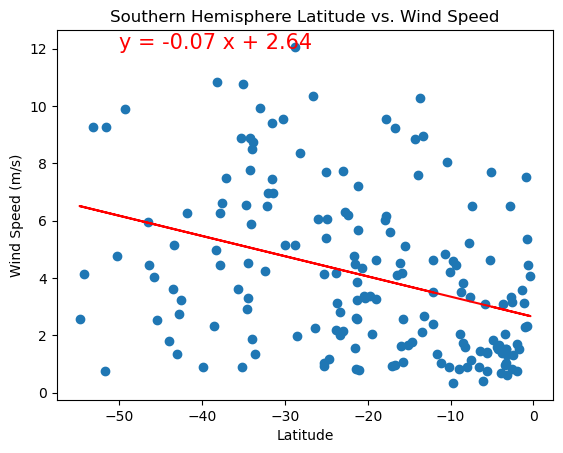

R-squared is: 0.12968994763608546


In [85]:
# Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_wind = southern_hemi_df["Wind Speed"]

slope, intercept, rvalue, regress_values, line_eq, plt = linreg(south_lat,south_wind)

plt.title("Southern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.annotate(line_eq, (-50, 12), fontsize=15, color="red")
plt.show()
print(f"R-squared is: {rvalue**2}")

**Discussion about the linear relationship:** The r squared values show that latitude is not strongly predictive of wind speed. 